In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import shapiro, levene, kruskal
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

# Análise Inicial

In [2]:
path = "../data/raw/01_supermercados.csv"

df = pd.read_csv(path, sep=',', encoding='latin-1')

print(f'Tamanho da base: {df.shape[0]} registros e {df.shape[1]} variáveis')

print(f'Variáveis: {list(df.columns)}')

print(df.dtypes)

df.tail(10)

Tamanho da base: 9994 registros e 21 variáveis
Variáveis: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [3]:
dados_nulos = df.isnull().sum()


tabela_nulos = pd.DataFrame({
    'Nome da Variável': dados_nulos.index,
    'Quantidade de Dados Nulos': dados_nulos.values
})


print(tabela_nulos)


   Nome da Variável  Quantidade de Dados Nulos
0            Row ID                          0
1          Order ID                          0
2        Order Date                          0
3         Ship Date                          0
4         Ship Mode                          0
5       Customer ID                          0
6     Customer Name                          0
7           Segment                          0
8           Country                          0
9              City                          0
10            State                          0
11      Postal Code                          0
12           Region                          0
13       Product ID                          0
14         Category                          0
15     Sub-Category                          0
16     Product Name                          0
17            Sales                          0
18         Quantity                          0
19         Discount                          0
20           

# Limpeza dos Dados

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print("Datas não convertidas (nulos após conversão):")
print(df[['Order Date', 'Ship Date']].isnull().sum())

duplicatas = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicatas}")
df = df.drop_duplicates()

categorias = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for coluna in categorias:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].value_counts())

print("\nValores únicos para 'Country':")
print(df['Country'].unique())

print("\nDescontos fora do padrão (esperado entre 0 e 0.8):")
print(df[df['Discount'] > 0.8])

print("\nValores negativos:")
print(df[(df['Sales'] < 0) | (df['Quantity'] < 0) | (df['Postal Code'] < 0)])

print("\nResumo dos dados após limpeza:")
print(df.info())


Datas não convertidas (nulos após conversão):
Order Date    0
Ship Date     0
dtype: int64
Número de registros duplicados: 0

Valores únicos em Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Valores únicos em Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Valores únicos em Country:
Country
United States    9994
Name: count, dtype: int64

Valores únicos em Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Valores únicos em Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Valores únicos em Sub-Category:
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Table

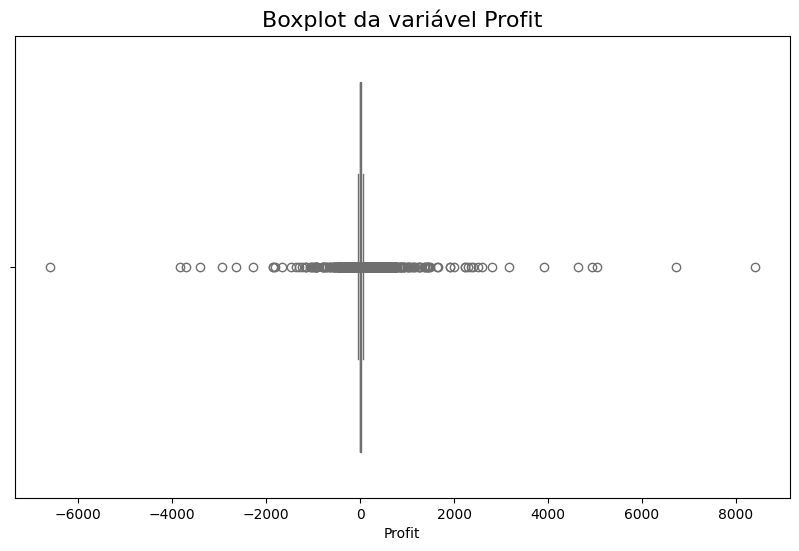

In [5]:
# Box-plot para verificar outliers em Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='skyblue')
plt.title('Boxplot da variável Profit', fontsize=16)
plt.xlabel('Profit')
plt.show()

## Justificativas Limpeza de Dados
- verificamos valores nulos e não havia nenhum
- verificamos duplicatas e nao havia nenhum
- verificamos inconscistencias nos dados e não encontramos nenhuma
- Verificamos outliers e identificamos a presença na variável Profit, porém decidimos não excluir, pois queremos analisar os fatores que levaram a um lucro muito alto, muito baixo ou até mesmo a um prejuízo elevado.
- verificamos valores negativos em variáveis númericas que não podem ser negativas e não encontramos nenhum

### Justificava por ter alterado Datas para Datetime
Converter as colunas de datas para o tipo datetime é essencial, pois permite realizar operações e análises temporais. Com datetime, é possível calcular prazos (como o tempo de entrega), filtrar registros por ano, mês ou dia, e gerar análises sazonais ou de tendências. Além disso, facilita ordenações cronológicas, agrupamentos e evita erros que ocorreriam se as datas fossem tratadas como texto. Isso torna o processo de análise de dados mais eficiente, preciso e flexível.

# Análise Estatística e Visual


In [6]:
estatisticas = df[["Sales", "Quantity", "Discount", "Profit"]].describe()

estatisticas.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º_quartil',
    '50%': 'mediana',
    '75%': '3º_quartil',
    'max': 'máximo'
}, inplace=True)

print(estatisticas)

                      Sales     Quantity     Discount       Profit
contagem        9994.000000  9994.000000  9994.000000  9994.000000
média            229.858001     3.789574     0.156203    28.656896
desvio_padrão    623.245101     2.225110     0.206452   234.260108
mínimo             0.444000     1.000000     0.000000 -6599.978000
1º_quartil        17.280000     2.000000     0.000000     1.728750
mediana           54.490000     3.000000     0.200000     8.666500
3º_quartil       209.940000     5.000000     0.200000    29.364000
máximo         22638.480000    14.000000     0.800000  8399.976000


In [7]:
variaveis = ["Sales", "Quantity", "Discount", "Profit"]

for var in variaveis:
    print(f"\nAnálise da variável: {var}")
    print("-" * 40)
    
    media = df[var].mean()
    mediana = df[var].median()
    moda = df[var].mode().values
    desvio = df[var].std()
    variancia = df[var].var()
    minimo = df[var].min()
    maximo = df[var].max()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    amplitude = maximo - minimo

    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda}")
    print(f"Desvio Padrão: {desvio:.2f}")
    print(f"Variância: {variancia:.2f}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")
    print(f"Amplitude: {amplitude}")
    print(f"1º Quartil (Q1): {q1}")
    print(f"3º Quartil (Q3): {q3}")
    print(f"Intervalo Interquartil (IQR): {iqr}")


Análise da variável: Sales
----------------------------------------
Média: 229.86
Mediana: 54.49
Moda: [12.96]
Desvio Padrão: 623.25
Variância: 388434.46
Mínimo: 0.444
Máximo: 22638.48
Amplitude: 22638.036
1º Quartil (Q1): 17.28
3º Quartil (Q3): 209.94
Intervalo Interquartil (IQR): 192.66

Análise da variável: Quantity
----------------------------------------
Média: 3.79
Mediana: 3.00
Moda: [3]
Desvio Padrão: 2.23
Variância: 4.95
Mínimo: 1
Máximo: 14
Amplitude: 13
1º Quartil (Q1): 2.0
3º Quartil (Q3): 5.0
Intervalo Interquartil (IQR): 3.0

Análise da variável: Discount
----------------------------------------
Média: 0.16
Mediana: 0.20
Moda: [0.]
Desvio Padrão: 0.21
Variância: 0.04
Mínimo: 0.0
Máximo: 0.8
Amplitude: 0.8
1º Quartil (Q1): 0.0
3º Quartil (Q3): 0.2
Intervalo Interquartil (IQR): 0.2

Análise da variável: Profit
----------------------------------------
Média: 28.66
Mediana: 8.67
Moda: [0.]
Desvio Padrão: 234.26
Variância: 54877.80
Mínimo: -6599.978
Máximo: 8399.976
Amplitude

## Análise interpretativa das variáveis:
### Sales (Vendas)
Assimetria muito forte à direita (distribuição enviesada):
- Média (229,86) muito maior que a mediana (54,49).
- Existem vendas muito altas que puxam a média pra cima.
- Alta dispersão: Desvio padrão de 623,25 e amplitude absurda (22.638).

Conclusão: A maioria das vendas são de baixo valor, mas existem poucos pedidos com valores muito altos.

### Quantity (Quantidade)
- Distribuição bem comportada:
    - Média (3,79) e mediana (3) muito próximas.
    - Moda = 3, ou seja, é o valor mais comum.
- Dispersão baixa: Desvio padrão de 2,23 e IQR de 3.
- Conclusão: A maioria dos pedidos envolve entre 2 e 5 itens.

### Discount (Desconto)
- Distribuição concentrada:
    - Moda = 0 → muitos pedidos sem desconto.
    - Q3 = 0,2 → 75% dos pedidos têm no máximo 20% de desconto.
- Baixíssima dispersão: Desvio de 0,21 e amplitude de 0,8.
- Conclusão: Descontos são aplicados com moderação e não há grande variabilidade.

### Profit (Lucro)
- Distribuição altamente assimétrica:
    - Média (28,66) muito maior que a mediana (8,67).
    - Existem lucros muito altos, mas também prejuízos grandes (mínimo de -6.599).
- Desvio padrão muito alto (234,26), IQR de 27,63: → dados bem dispersos.

### Conclusão:
- A maioria dos pedidos dá um lucro pequeno.
- Existem vários pedidos com prejuízo (ponto de alerta para análise do negócio).

### Pontos críticos para negócios:
- Produtos que geram prejuízo (Profit negativo) → precisam ser analisados.
- A distribuição de Sales e Profit são altamente distorcidas, sugerindo que poucos pedidos geram a maior parte da receita ou do prejuízo → clássico caso da Lei de Pareto (80/20).

# Histogramas das variáveis

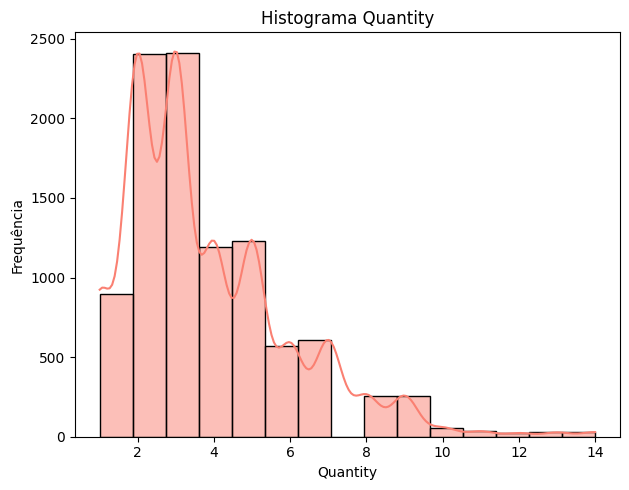

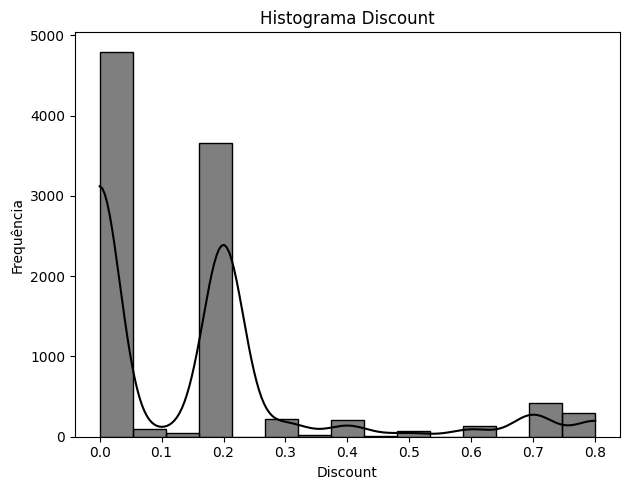

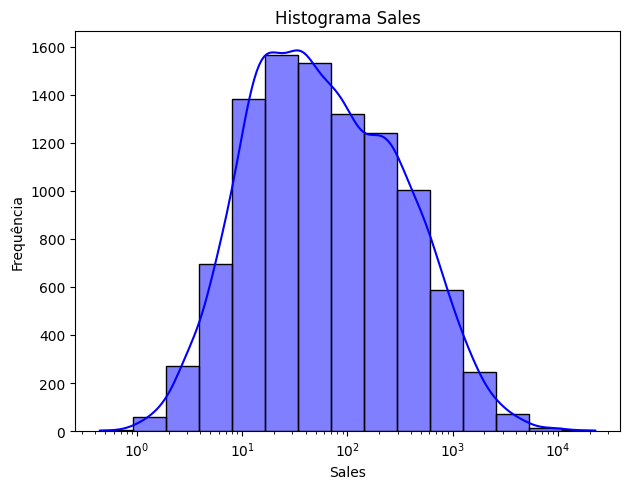

c:\Users\Malu Abrami\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


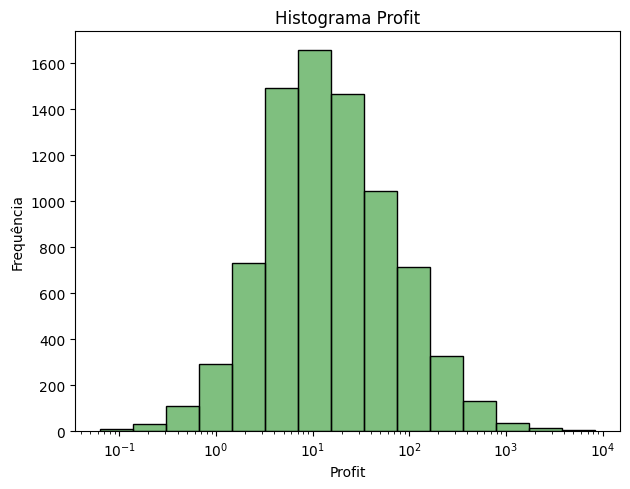

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=15, kde=True, color='salmon')
plt.title('Histograma Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Discount'], bins=15, kde=True, color='black')
plt.title('Histograma Discount')
plt.xlabel('Discount')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(df['Sales'], bins=15, kde=True, color='blue', log_scale=True)
plt.title('Histograma Sales')
plt.xlabel('Sales')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=15, kde=True, color='green', log_scale=True)
plt.title('Histograma Profit')
plt.xlabel('Profit')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


# Boxplot das variáveis

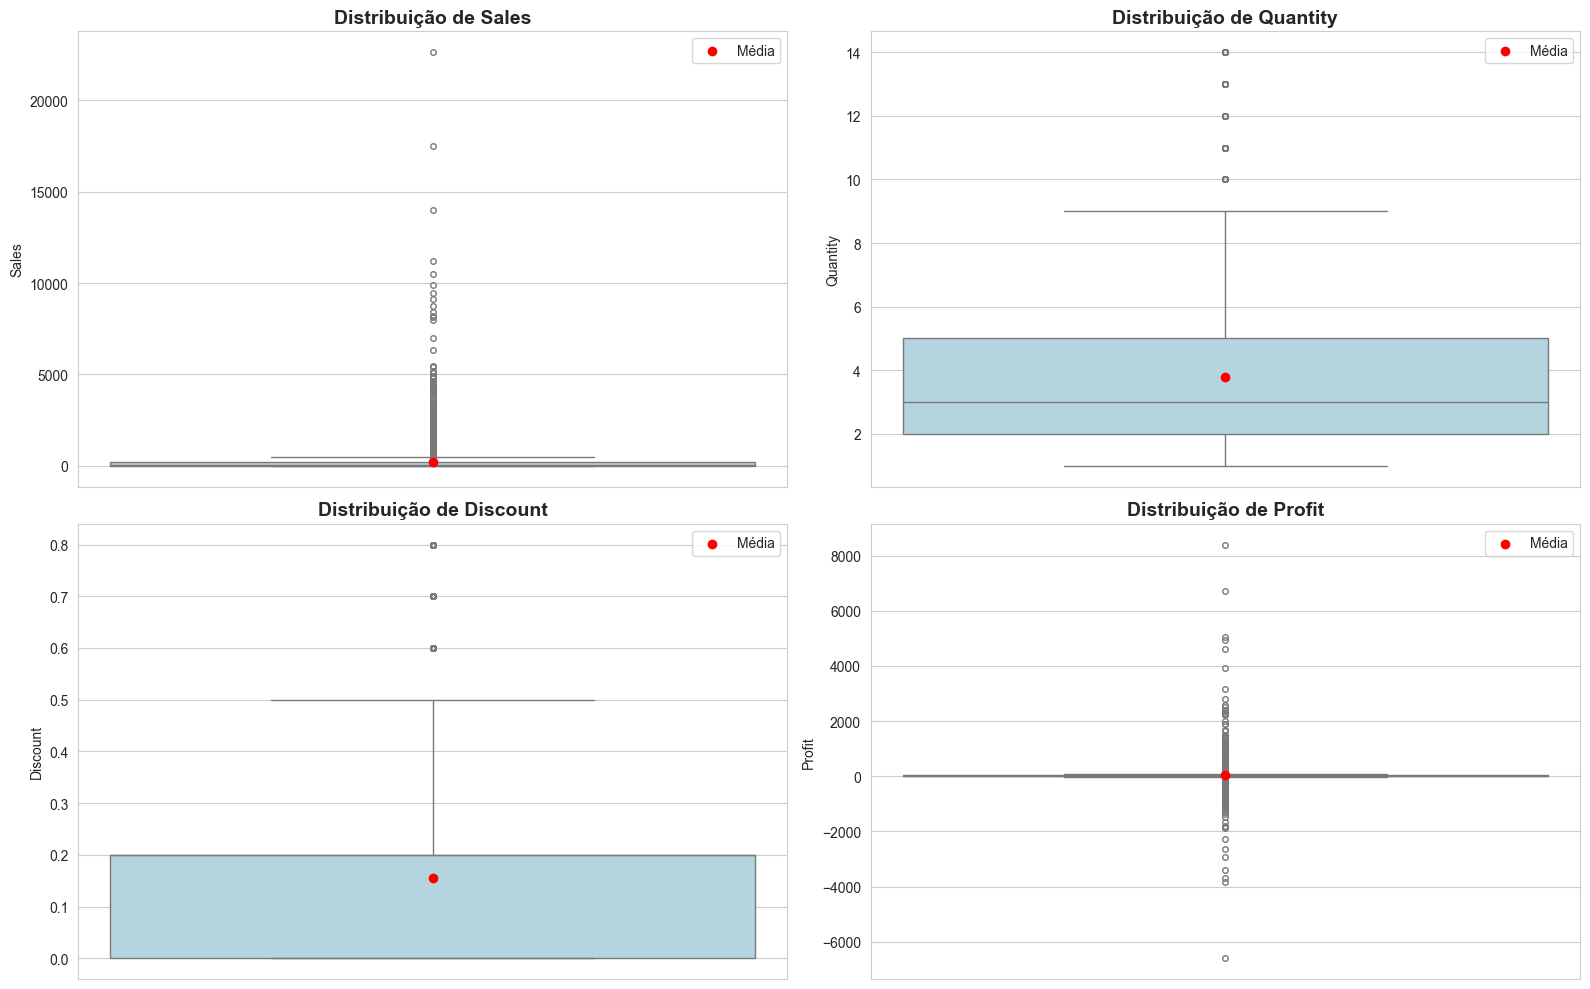

In [9]:
sns.set_style("whitegrid")
variaveis = ["Sales", "Quantity", "Discount", "Profit"]
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i, var in enumerate(variaveis):
    sns.boxplot(data=df, y=var, ax=axes[i], color='lightblue', width=0.4, fliersize=4)
    mean_val = df[var].mean()
    axes[i].scatter(0, mean_val, color='red', zorder=5, label='Média')
    axes[i].set_title(f'Distribuição de {var}', fontsize=14, weight='bold')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('')
    axes[i].legend()
plt.tight_layout()
plt.show()


# Matriz de Correlação entre variáveis númericas

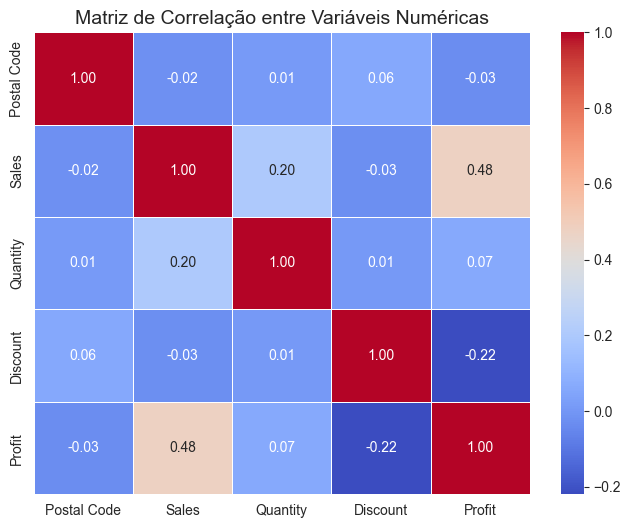

In [10]:
dados_numericos = df[["Postal Code", "Sales", "Quantity", "Discount", "Profit"]]

matriz_correlacao = dados_numericos.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14)
plt.show()

## Análise Interpretativa da Matriz
- Código Postal: Apresenta correlações próximas de zero com as demais variáveis, indicando que ele não influencia diretamente Vendas, Quantidade, Desconto ou Lucro.

- Vendas: Tem uma correlação positiva moderada com Lucro (0.48), sugerindo que quando as vendas aumentam, o lucro também tende a crescer. Além disso, há uma correlação positiva baixa com Quantidade (0.20).

- Quantidade: Exibe uma correlação positiva baixa com Vendas (0.20) e uma correlação muito fraca com Lucro (0.07), o que indica que vender mais unidades nem sempre significa maior lucro.

- Desconto: Apresenta uma correlação negativa baixa com Lucro (-0.22), sugerindo que descontos podem ter um impacto negativo no lucro, ainda que não seja uma relação forte.

- Lucro: Tem correlação positiva moderada com Vendas (0.48) e negativa baixa com Desconto (-0.22), reforçando a ideia de que vender mais tende a gerar mais lucro, enquanto dar descontos pode reduzi-lo.

# Gráfico de Dispersão

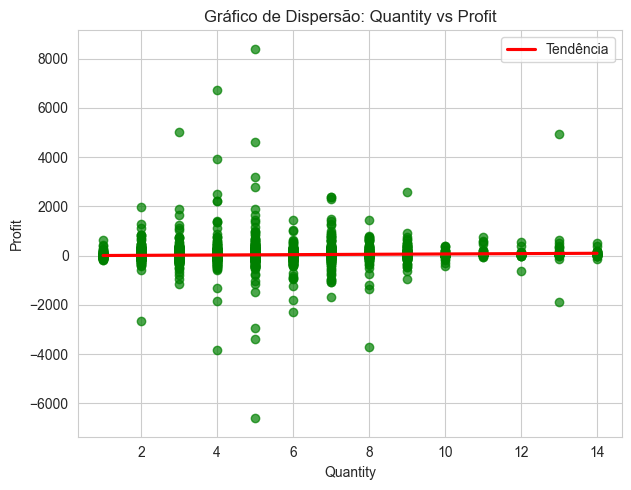

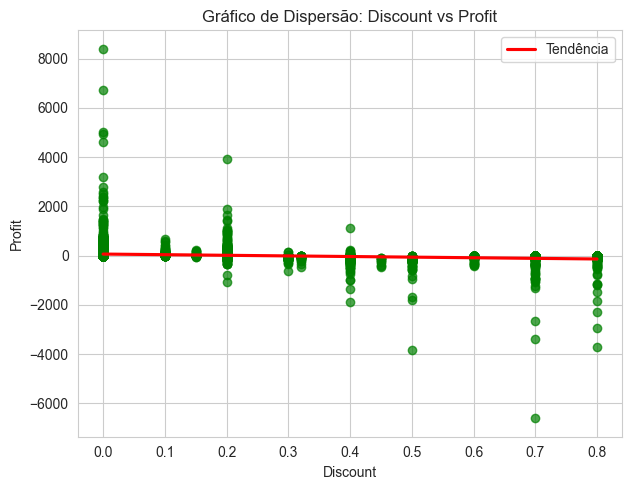

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.regplot(x=df['Quantity'], y=df['Profit'], color='green', scatter_kws={'alpha':0.7},
            line_kws={'color':'red', 'label':'Tendência'})
plt.title('Gráfico de Dispersão: Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.regplot(x=df['Discount'], y=df['Profit'], color='green', scatter_kws={'alpha':0.7},
            line_kws={'color':'red', 'label':'Tendência'})
plt.title('Gráfico de Dispersão: Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de Dispersão em Logaritmo

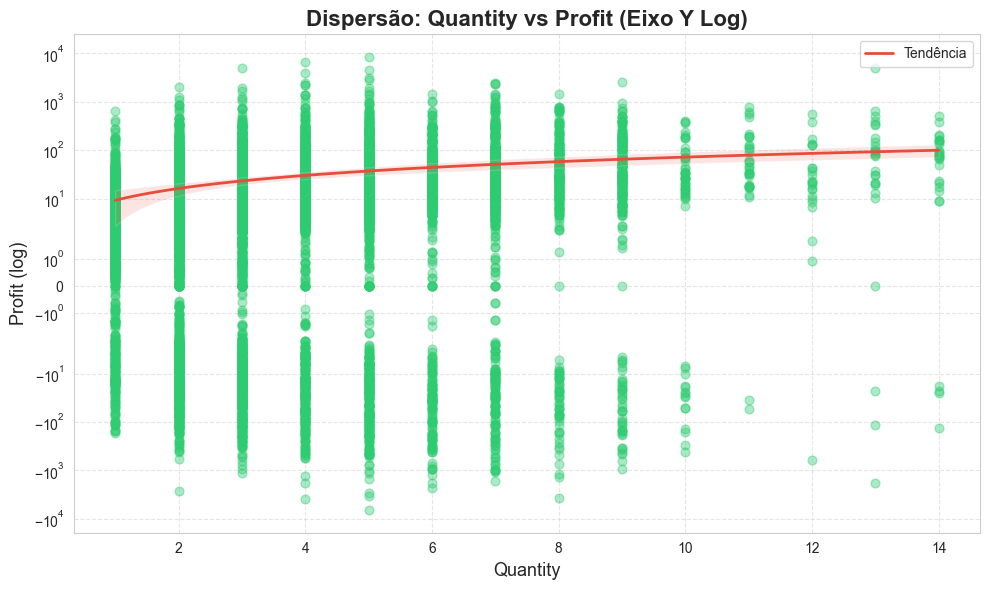

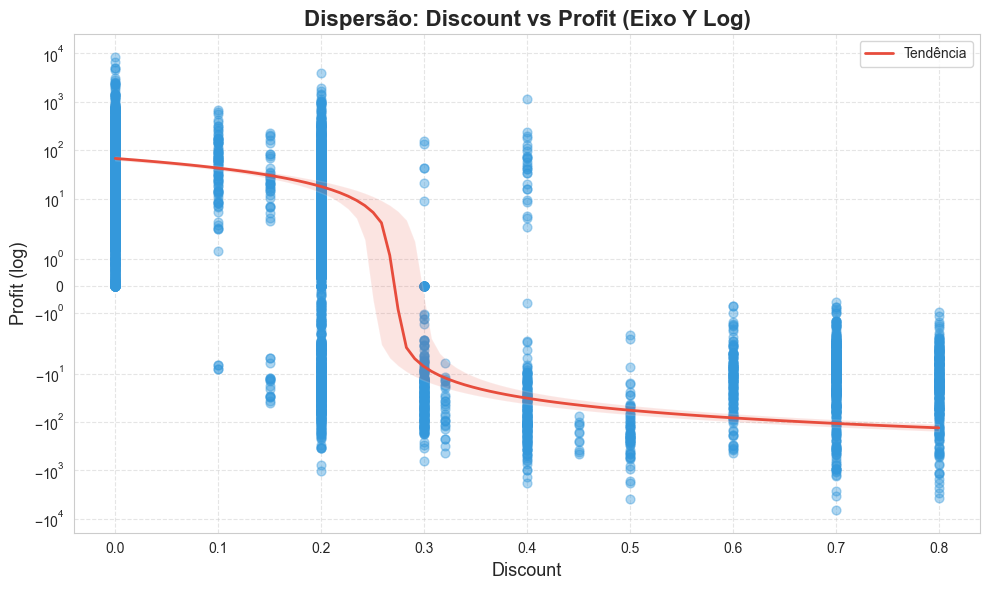

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Quantity', y='Profit', data=df,
    scatter_kws={'alpha':0.4, 's':40, 'color':'#2ecc71'},
    line_kws={'color':'#e74c3c', 'label':'Tendência', 'lw':2}
)
plt.yscale('symlog')
plt.title('Dispersão: Quantity vs Profit (Eixo Y Log)', fontsize=16, weight='bold')
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Profit (log)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Discount', y='Profit', data=df,
    scatter_kws={'alpha':0.4, 's':40, 'color':'#3498db'},
    line_kws={'color':'#e74c3c', 'label':'Tendência', 'lw':2}
)
plt.yscale('symlog')
plt.title('Dispersão: Discount vs Profit (Eixo Y Log)', fontsize=16, weight='bold')
plt.xlabel('Discount', fontsize=13)
plt.ylabel('Profit (log)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Análises Extras sobre os desafios do  Anexo I

## Categorias e Sub-categorias dos Produtos

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\1015265735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='Set2')


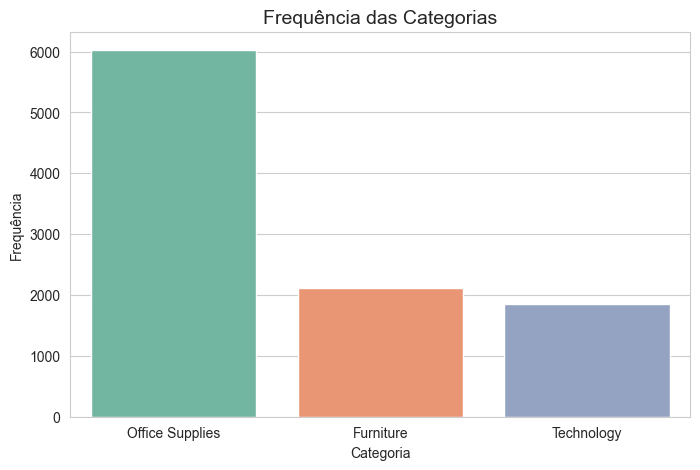

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\1015265735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sub-Category', order=df['Sub-Category'].value_counts().index, palette='Set3')


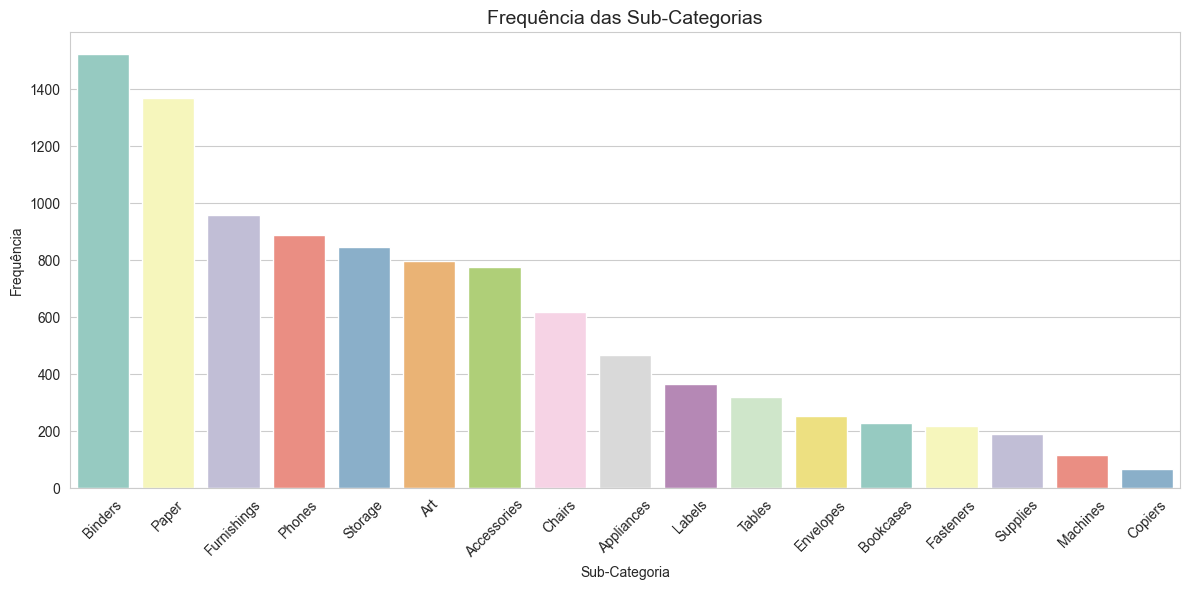

           Category Sub-Category
0         Furniture    Bookcases
1         Furniture       Chairs
2         Furniture  Furnishings
3         Furniture       Tables
4   Office Supplies   Appliances
5   Office Supplies          Art
6   Office Supplies      Binders
7   Office Supplies    Envelopes
8   Office Supplies    Fasteners
9   Office Supplies       Labels
10  Office Supplies        Paper
11  Office Supplies      Storage
12  Office Supplies     Supplies
13       Technology  Accessories
14       Technology      Copiers
15       Technology     Machines
16       Technology       Phones


In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='Set2')
plt.title('Frequência das Categorias', fontsize=14)
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sub-Category', order=df['Sub-Category'].value_counts().index, palette='Set3')
plt.title('Frequência das Sub-Categorias', fontsize=14)
plt.xlabel('Sub-Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sub_categorias = df[['Category', 'Sub-Category']].drop_duplicates().sort_values(['Category', 'Sub-Category'])
print(sub_categorias.reset_index(drop=True))

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\1349628612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_categoria.index, y=lucro_categoria.values, palette='viridis')


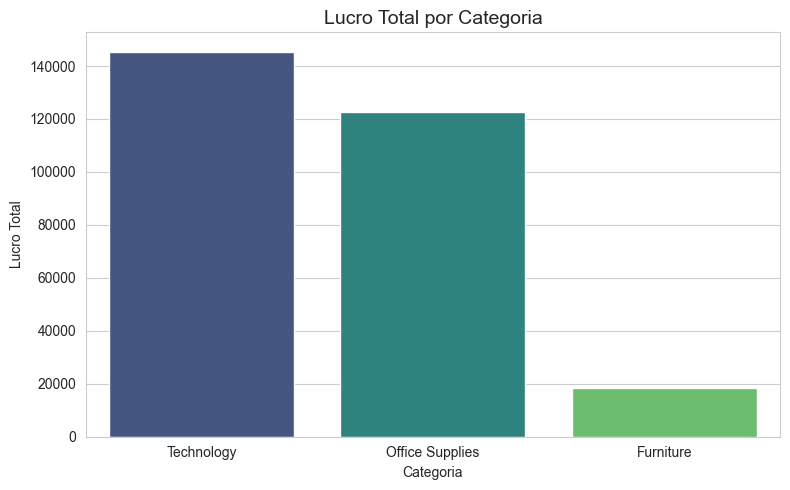

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\1349628612.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_subcategoria.index, y=lucro_subcategoria.values, palette='magma')


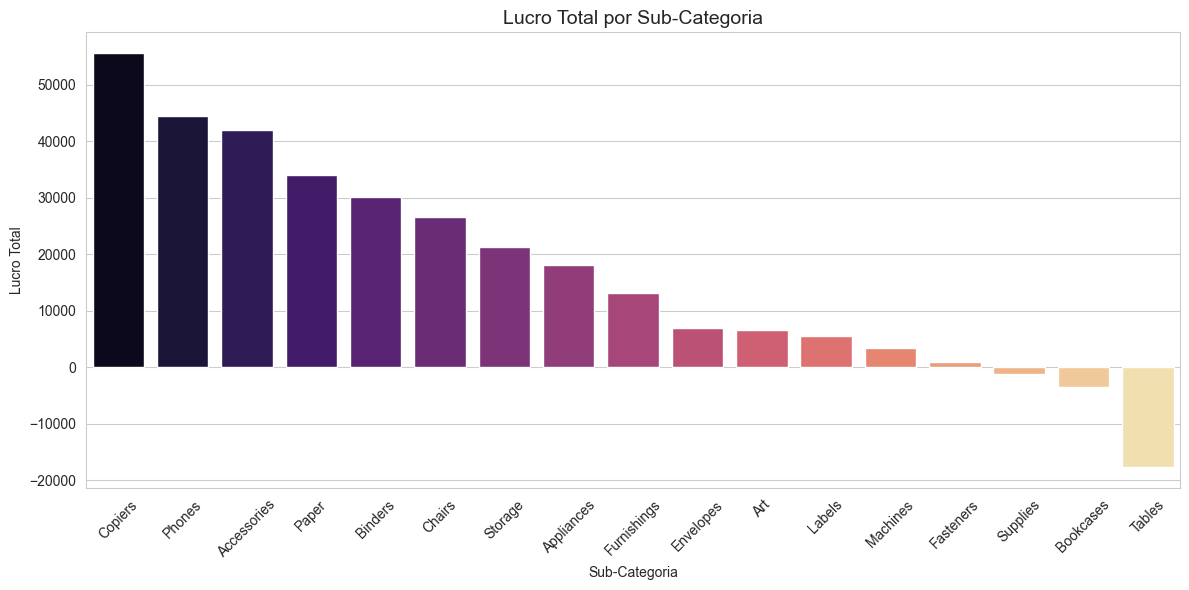


Piores vendas (menor lucro) na sub-categoria 'Supplies':
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1803    1804  CA-2017-158379 2017-09-22 2017-09-26    Second Class   
5198    5199  CA-2016-103982 2016-03-03 2016-03-08  Standard Class   
4458    4459  CA-2017-105851 2017-03-13 2017-03-20  Standard Class   
288      289  CA-2016-112697 2016-12-18 2016-12-20    Second Class   
9316    9317  CA-2016-161907 2016-04-05 2016-04-09  Standard Class   
...      ...             ...        ...        ...             ...   
2600    2601  CA-2017-108553 2017-04-23 2017-04-29  Standard Class   
3280    3281  CA-2014-102988 2014-04-05 2014-04-09    Second Class   
6620    6621  US-2017-167402 2017-01-13 2017-01-18    Second Class   
5884    5885  CA-2016-136301 2016-03-13 2016-03-15    Second Class   
2505    2506  CA-2014-143917 2014-07-25 2014-07-27    Second Class   

     Customer ID   Customer Name    Segment        Country           City  \
1803    JA-15970    Jose

In [51]:
lucro_categoria = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_categoria.index, y=lucro_categoria.values, palette='viridis')
plt.title('Lucro Total por Categoria', fontsize=14)
plt.xlabel('Categoria')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

lucro_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=lucro_subcategoria.index, y=lucro_subcategoria.values, palette='magma')
plt.title('Lucro Total por Sub-Categoria', fontsize=14)
plt.xlabel('Sub-Categoria')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar sub-categorias com lucro total negativo
subcats_lucro_negativo = lucro_subcategoria[lucro_subcategoria < 0].index

# Para cada sub-categoria com lucro negativo
for subcat in subcats_lucro_negativo:
    print(f"\nPiores vendas (menor lucro) na sub-categoria '{subcat}':")
    vendas_piores = df[df['Sub-Category'] == subcat].sort_values(by='Profit')
    print(vendas_piores)

### Observações em relação as categorias e sub-categorias
- Podemos reparar que a sub-categoria "Copiers" é a com menor frequência nas vendas, contudo ela é a que está na frente disparado na questão de lucro. Com isso, é possível perceber que os outliers de Profit estão em sua grande maioria na categoria de Tecnologia e principalmente em Copiers
- Observamos também a sub-categoria que está causando um grande outlier negativo no Profit(lucro), que é a sub-categoria Tables que está presente na categoria Furniture. Sendo este um ponto que deve ser analisado para futuras conclusões do projeto

## Desafio de análise 1
- Identificar produtos e segmentos com maior margem de lucro.

                                           Product Name         Category  \
6826              Canon imageCLASS 2200 Advanced Copier       Technology   
8153              Canon imageCLASS 2200 Advanced Copier       Technology   
4190              Canon imageCLASS 2200 Advanced Copier       Technology   
9039   GBC Ibimaster 500 Manual ProClick Binding System  Office Supplies   
4098               Ibico EPK-21 Electric Binding System  Office Supplies   
2623              Canon imageCLASS 2200 Advanced Copier       Technology   
509   Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
8488  HP Designjet T520 Inkjet Large Format Printer ...       Technology   
7666               Hewlett Packard LaserJet 3310 Copier       Technology   
6520          GBC DocuBind P400 Electric Binding System  Office Supplies   

     Sub-Category     Profit      Sales  Discount   Region  
6826      Copiers  8399.9760  17499.950       0.0  Central  
8153      Copiers  6719.9808  13999.960  

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\389878702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


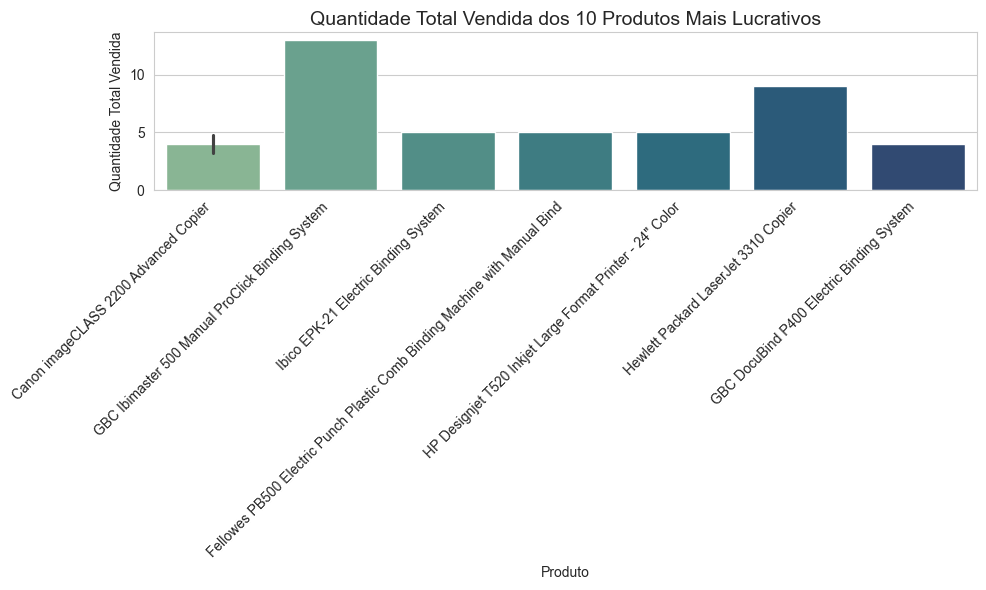

                                           Product Name         Category  \
1640              Canon imageCLASS 2200 Advanced Copier       Technology   
787   Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
1630               Hewlett Packard LaserJet 3310 Copier       Technology   
1637                 Canon PC1060 Personal Laser Copier       Technology   
1657  HP Designjet T520 Inkjet Large Format Printer ...       Technology   
1693                  Ativa V4110MDD Micro-Cut Shredder       Technology   
1656   3D Systems Cube Printer, 2nd Generation, Magenta       Technology   
1541  Plantronics Savi W720 Multi-Device Wireless He...       Technology   
692                Ibico EPK-21 Electric Binding System  Office Supplies   
1643                  Zebra ZM400 Thermal Label Printer       Technology   

     Sub-Category      Profit  
1640      Copiers  25199.9280  
787       Binders   7753.0390  
1630      Copiers   6983.8836  
1637      Copiers   4570.9347  
165

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\389878702.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


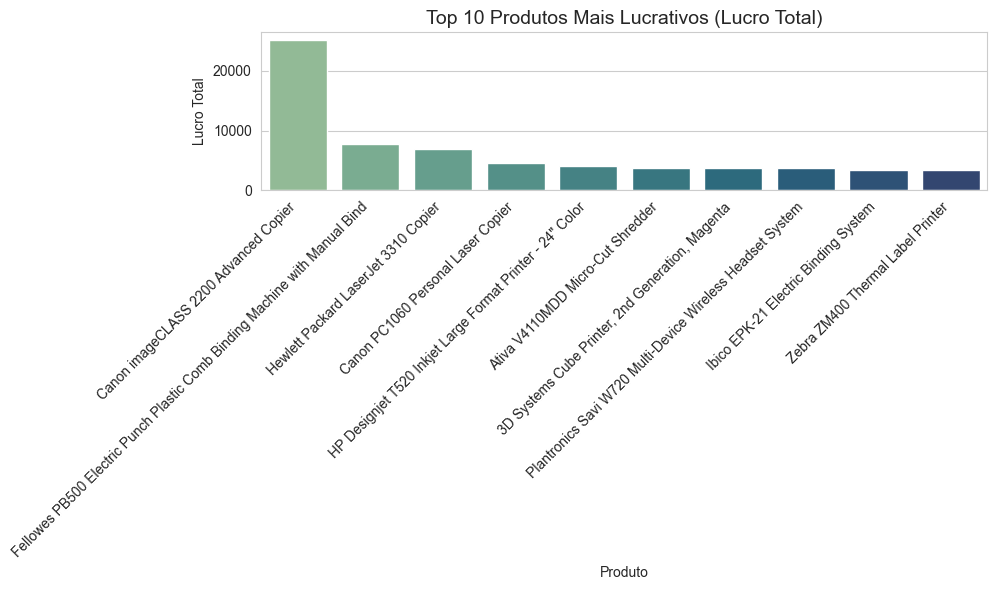

In [15]:
produtos_maior_lucro = df.sort_values(by='Profit', ascending=False).head(10)
print(produtos_maior_lucro[['Product Name', 'Category', 'Sub-Category', 'Profit', 'Sales', "Discount", 'Region']])

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Product Name',
    y='Quantity',
    data=produtos_maior_lucro,
    palette='crest'
)
plt.title('Quantidade Total Vendida dos 10 Produtos Mais Lucrativos', fontsize=14)
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lucro_total_produto = df.groupby(['Product ID', 'Product Name', 'Category', 'Sub-Category'], as_index=False)['Profit'].sum()
produtos_mais_lucrativos = lucro_total_produto.sort_values(by='Profit', ascending=False).head(10)

print(produtos_mais_lucrativos[['Product Name', 'Category', 'Sub-Category', 'Profit']])

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Product Name',
    y='Profit',
    data=produtos_mais_lucrativos,
    palette='crest'
)
plt.title('Top 10 Produtos Mais Lucrativos (Lucro Total)', fontsize=14)
plt.xlabel('Produto')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
ids_mais_lucrativos = produtos_maior_lucro['Product ID'].unique()

produtos_relacionados = df[df['Product ID'].isin(ids_mais_lucrativos)]

print(produtos_relacionados[['Product ID', 'Product Name', 'Category', 'Sub-Category', 'Profit', 'Sales', 'Discount', 'Quantity', 'Segment', 'Customer Name']].sort_values('Profit', ascending=False))

           Product ID                                       Product Name  \
6826  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
8153  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
4190  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
9039  OFF-BI-10000545   GBC Ibimaster 500 Manual ProClick Binding System   
4098  OFF-BI-10001120               Ibico EPK-21 Electric Binding System   
2623  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
509   OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
8488  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
7666  TEC-CO-10001449               Hewlett Packard LaserJet 3310 Copier   
6520  OFF-BI-10004995          GBC DocuBind P400 Electric Binding System   
6626  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
7683  OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
8858  OFF-BI

### Observações sobre os produtos mais lucrativos
- Os produtos mais lucrativos pertencem as Categorias Technology e Office Supplies, sendo o top 3 da sub-categoria Copiers pertencente a categoria Tecnologia
- Pegando de base os produtos mais lucrativos e procurando por todos os seus casos, percebemos que quando os descontos passam de 0.4 em sua maioria estando em 0.7 e 0.8, até para os produtos mais lucrativos se torna um prejuizo enorme

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\2259787308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_por_segmento.index, y=lucro_por_segmento.values, palette='pastel')


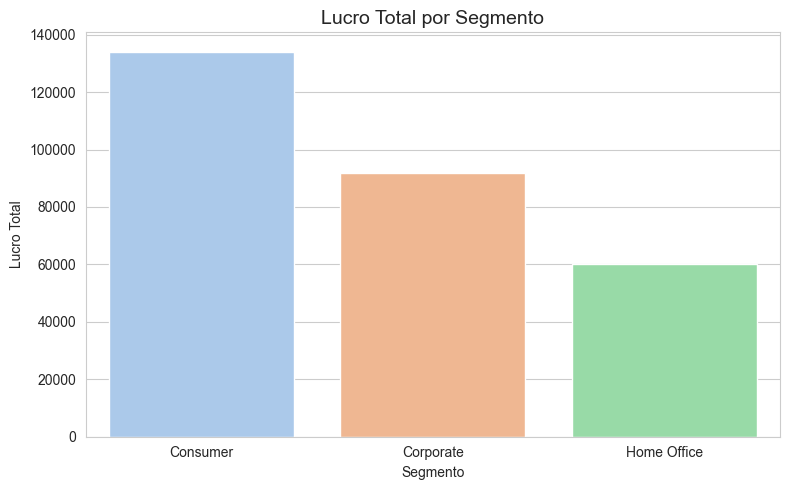

In [17]:
lucro_por_segmento = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(lucro_por_segmento)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_por_segmento.index, y=lucro_por_segmento.values, palette='pastel')
plt.title('Lucro Total por Segmento', fontsize=14)
plt.xlabel('Segmento')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

## Desafio de Análise 2
- Avaliar regiões ou clientes com baixa rentabilidade.

Lucro médio por Região:
Region
Central    17.092709
South      28.857673
East       32.135808
West       33.849032
Name: Profit, dtype: float64

Lucro médio por Estado (top 10 menores):
State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Texas            -26.121174
Illinois         -25.625787
Arizona          -15.303235
Oregon            -9.600569
Florida           -8.875461
Name: Profit, dtype: float64


C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\2104111338.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Profit', data=df, palette='pastel')


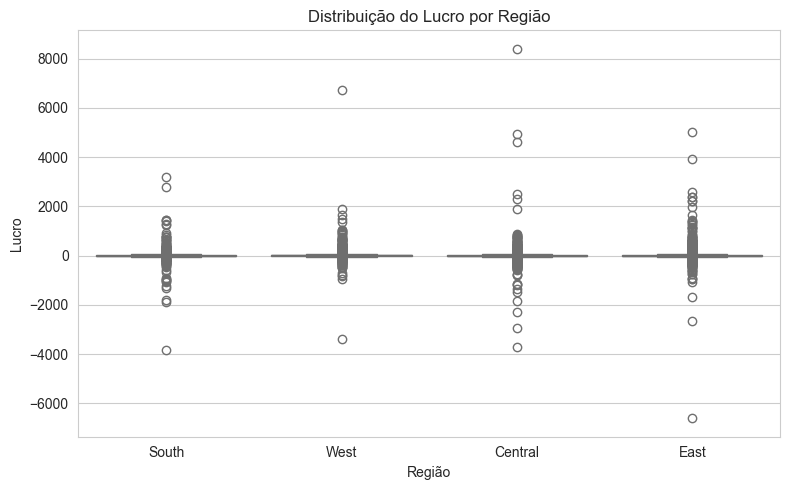

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\2104111338.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_total_regiao.index, y=lucro_total_regiao.values, palette='Greens')


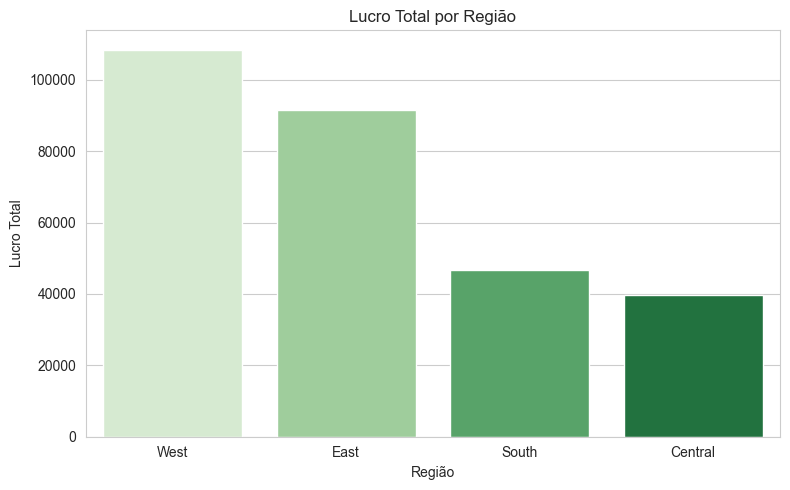

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\2104111338.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_regiao.index, y=lucro_regiao.values, palette='Blues')


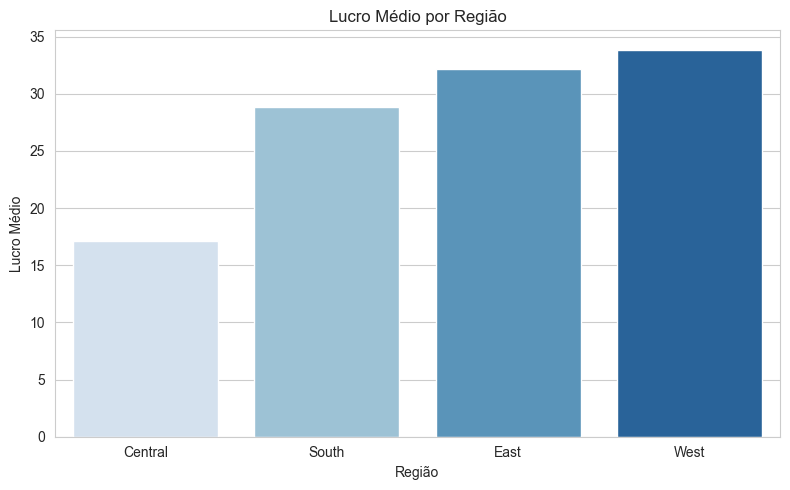

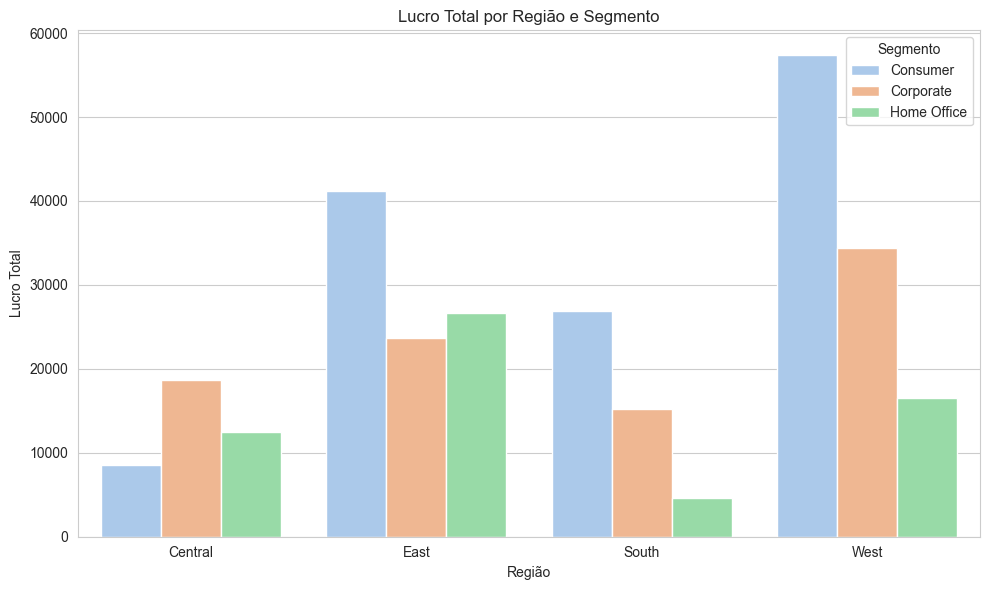

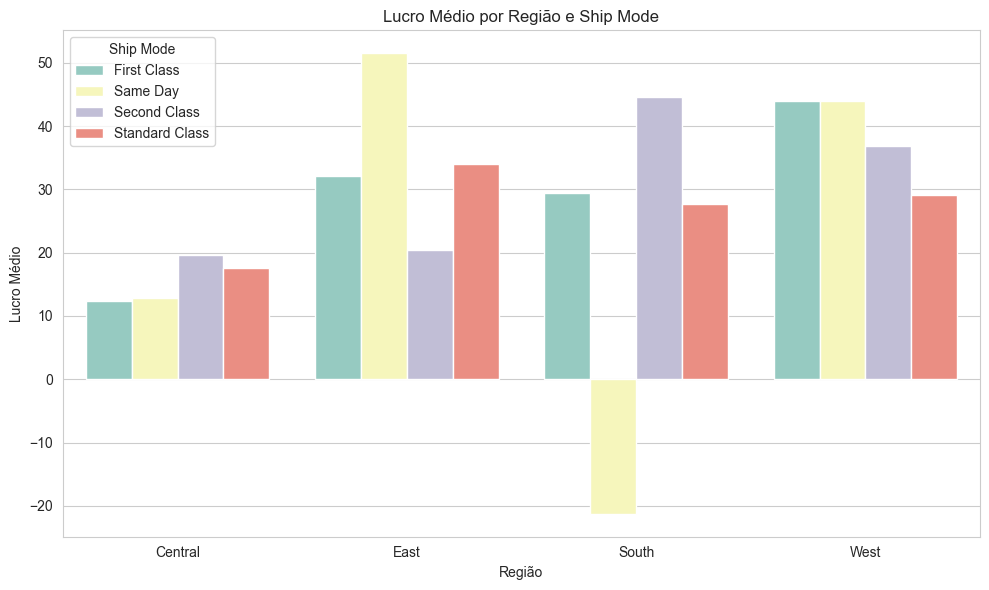

Região: South | Lucro médio: 28.86 | Desconto médio: 0.15
Região: West | Lucro médio: 33.85 | Desconto médio: 0.11
Região: Central | Lucro médio: 17.09 | Desconto médio: 0.24
Região: East | Lucro médio: 32.14 | Desconto médio: 0.15


In [18]:
lucro_regiao = df.groupby('Region')['Profit'].mean().sort_values()
lucro_estado = df.groupby('State')['Profit'].mean().sort_values()

print("Lucro médio por Região:")
print(lucro_regiao)
print("\nLucro médio por Estado (top 10 menores):")
print(lucro_estado.head(10))

plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='Profit', data=df, palette='pastel')
plt.title('Distribuição do Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.tight_layout()
plt.show()

lucro_total_regiao = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_total_regiao.index, y=lucro_total_regiao.values, palette='Greens')
plt.title('Lucro Total por Região')
plt.xlabel('Região')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=lucro_regiao.index, y=lucro_regiao.values, palette='Blues')
plt.title('Lucro Médio por Região')
plt.xlabel('Região')
plt.ylabel('Lucro Médio')
plt.tight_layout()
plt.show()

lucro_total_regiao_segmento = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', hue='Segment', data=lucro_total_regiao_segmento, palette='pastel')
plt.title('Lucro Total por Região e Segmento')
plt.xlabel('Região')
plt.ylabel('Lucro Total')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

lucro_regiao_shipmode = df.groupby(['Region', 'Ship Mode'])['Profit'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', hue='Ship Mode', data=lucro_regiao_shipmode, palette='Set3')
plt.title('Lucro Médio por Região e Ship Mode')
plt.xlabel('Região')
plt.ylabel('Lucro Médio')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

for regiao in df['Region'].unique():
    media_lucro = df[df['Region'] == regiao]['Profit'].mean()
    media_desconto = df[df['Region'] == regiao]['Discount'].mean()
    print(f"Região: {regiao} | Lucro médio: {media_lucro:.2f} | Desconto médio: {media_desconto:.2f}")


### Observações em relação as regiões:
- Algumas regiões apresentam lucro médio menor, frequentemente associado a descontos mais altos ou uso de Ship Modes mais caros.
- Estados com menor lucro médio podem estar concentrados em regiões específicas, indicando desafios logísticos ou necessidade de promoções.
- O Ship Mode pode impactar o lucro, especialmente quando combinado com descontos frequentes.

## Desafio de Análise 3
- Detectar padrões sazonais e logísticos que impactam as vendas.

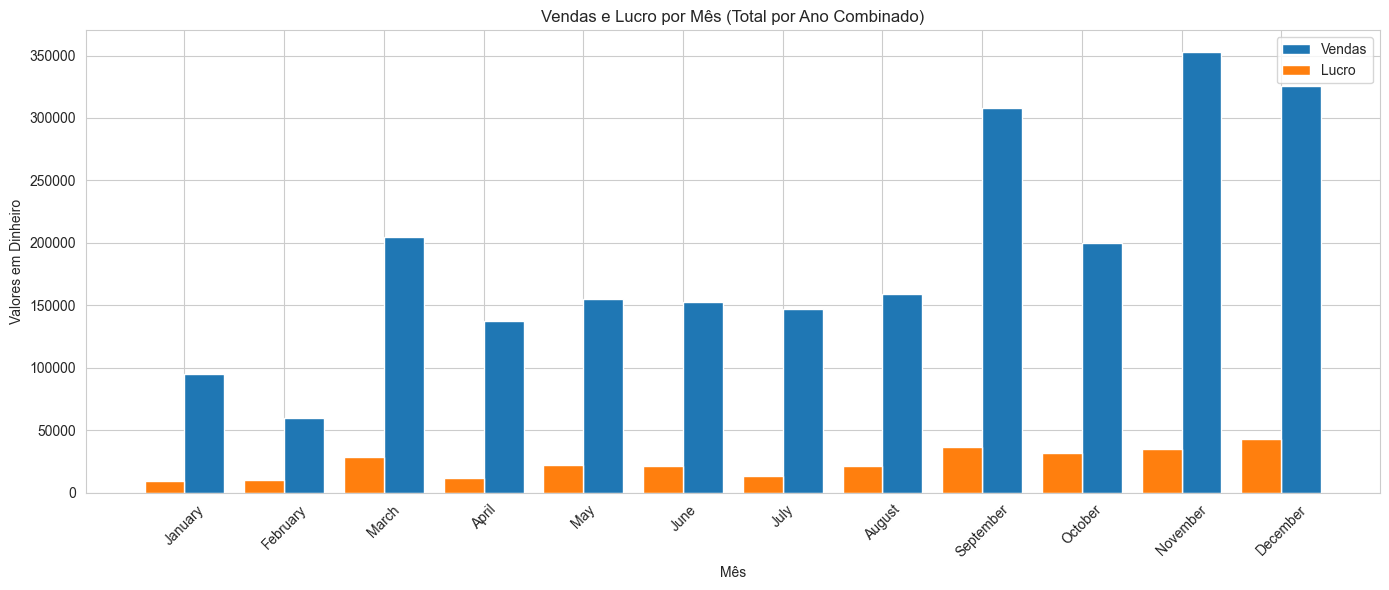

In [19]:
df['Mês'] = df['Order Date'].dt.month
df['Nome do Mês'] = df['Order Date'].dt.month_name()
resumo_mensal = df.groupby('Mês')[['Sales', 'Profit']].sum().reset_index()
resumo_mensal['Nome do Mês'] = resumo_mensal['Mês'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
resumo_mensal = resumo_mensal.sort_values('Mês')

plt.figure(figsize=(14, 6))
largura = 0.4
plt.bar(resumo_mensal['Nome do Mês'], resumo_mensal['Sales'], width=largura, label='Vendas', align='edge')
plt.bar(resumo_mensal['Nome do Mês'], resumo_mensal['Profit'], width=-largura, label='Lucro', align='edge')
plt.title('Vendas e Lucro por Mês (Total por Ano Combinado)')
plt.xlabel('Mês')
plt.ylabel('Valores em Dinheiro')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

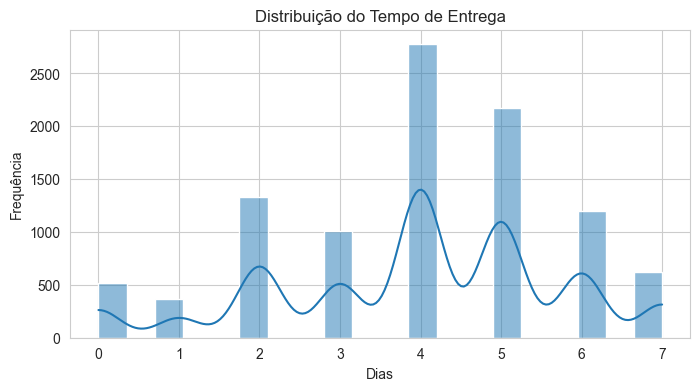

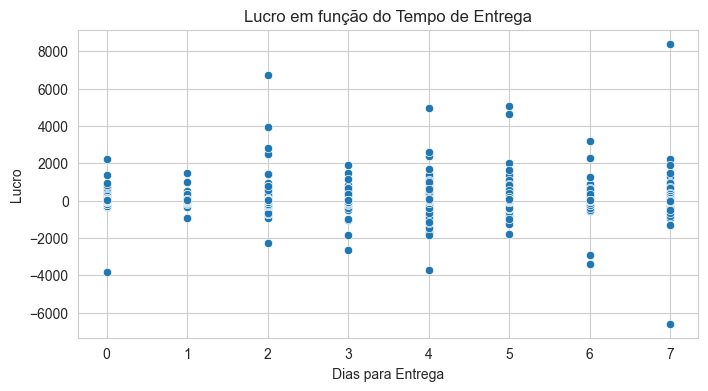

In [20]:
df['Tempo Entrega (dias)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 4))
sns.histplot(df['Tempo Entrega (dias)'], bins=20, kde=True)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Tempo Entrega (dias)', y='Profit', data=df)
plt.title('Lucro em função do Tempo de Entrega')
plt.xlabel('Dias para Entrega')
plt.ylabel('Lucro')
plt.grid(True)
plt.show()

# Hipóteses

## Hipótese 1
- H₀ (Hipótese Nula):
    - Não há diferença significativa entre os lucros médios das categorias Technology e Office Supplies.
- H₁ (Hipótese Alternativa):
    - O lucro médio da categoria Technology é maior que o da categoria Office Supplies.


In [21]:
tech_profit = df[df['Category'] == 'Technology']['Profit']

Q1 = tech_profit.quantile(0.25)
Q3 = tech_profit.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = tech_profit[(tech_profit < lower_limit) | (tech_profit > upper_limit)]
print(f"Número de outliers em 'Technology': {outliers.count()}")

Número de outliers em 'Technology': 250


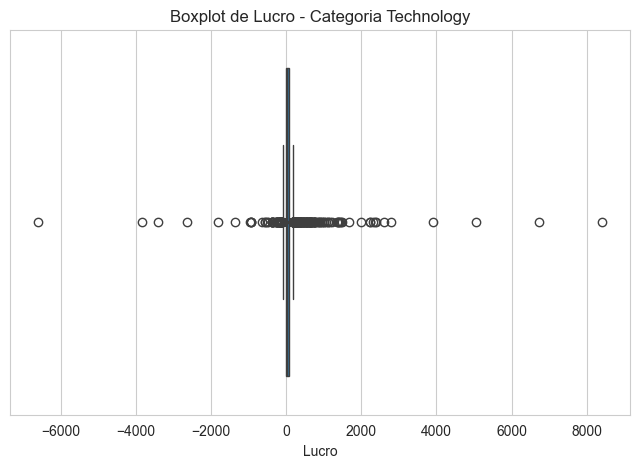

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[df['Category'] == 'Technology']['Profit'])
plt.title('Boxplot de Lucro - Categoria Technology')
plt.xlabel('Lucro')
plt.show()

In [23]:
# Remove outliers
tech_profit_sem_outliers = tech_profit[(tech_profit >= lower_limit) & (tech_profit <= upper_limit)]

In [24]:
# Limita os outliers aos limites inferior e superior
tech_profit_winsorized = np.clip(tech_profit, lower_limit, upper_limit)

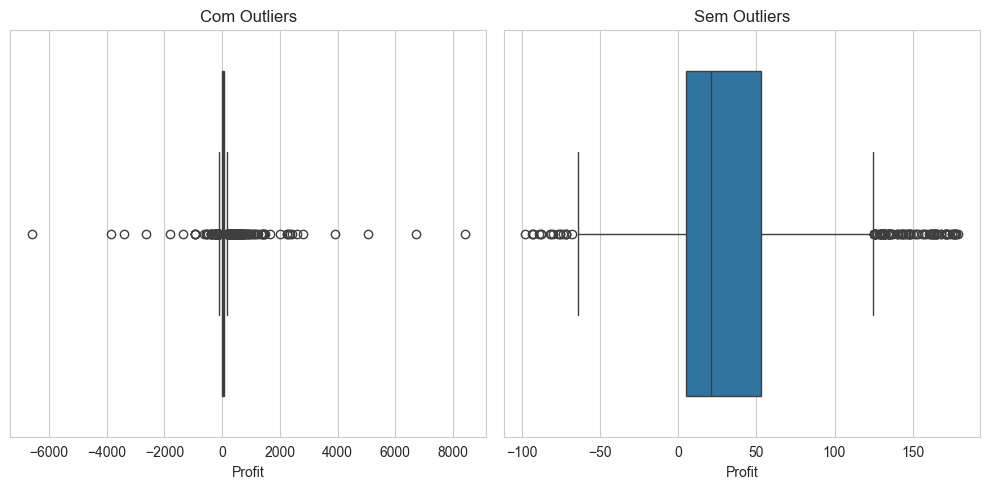

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\599504312.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_medio_com.index, y=lucro_medio_com.values, palette='Blues')


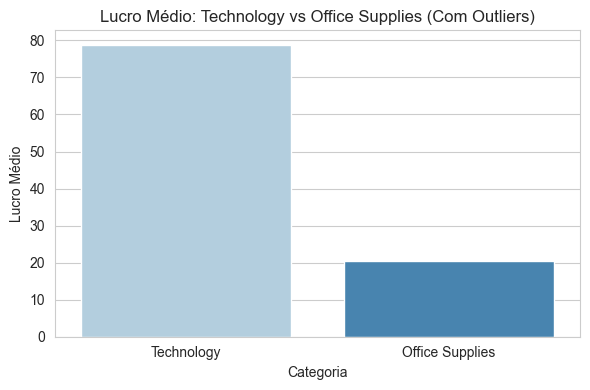

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\599504312.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lucro_medio_sem.index, y=lucro_medio_sem.values, palette='Greens')


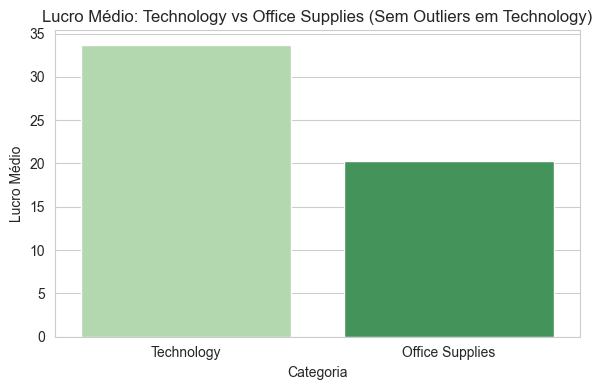

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=tech_profit)
plt.title('Com Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=tech_profit_sem_outliers)
plt.title('Sem Outliers')

plt.tight_layout()
plt.show()

lucro_medio_com = df[df['Category'].isin(['Technology', 'Office Supplies'])].groupby('Category')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=lucro_medio_com.index, y=lucro_medio_com.values, palette='Blues')
plt.title('Lucro Médio: Technology vs Office Supplies (Com Outliers)')
plt.xlabel('Categoria')
plt.ylabel('Lucro Médio')
plt.tight_layout()
plt.show()

tech_sem_outliers = tech_profit_sem_outliers
off_profit = df[df['Category'] == 'Office Supplies']['Profit']

lucro_medio_sem = pd.Series({
    'Technology': tech_sem_outliers.mean(),
    'Office Supplies': off_profit.mean()
}).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=lucro_medio_sem.index, y=lucro_medio_sem.values, palette='Greens')
plt.title('Lucro Médio: Technology vs Office Supplies (Sem Outliers em Technology)')
plt.xlabel('Categoria')
plt.ylabel('Lucro Médio')
plt.tight_layout()
plt.show()


In [26]:
# Teste de normalidade Shapiro-Wilk

stat_shapiro_com, p_shapiro_com = shapiro(tech_profit)
print(f"Shapiro-Wilk (com outliers): stat={stat_shapiro_com:.4f}, p-valor={p_shapiro_com:.4e}")

stat_shapiro_sem, p_shapiro_sem = shapiro(tech_profit_sem_outliers)
print(f"Shapiro-Wilk (sem outliers): stat={stat_shapiro_sem:.4f}, p-valor={p_shapiro_sem:.4e}")

if p_shapiro_com < 0.05:
    print("Com outliers: NÃO segue distribuição normal (p < 0.05)")
else:
    print("Com outliers: Segue distribuição normal (p >= 0.05)")

if p_shapiro_sem < 0.05:
    print("Sem outliers: NÃO segue distribuição normal (p < 0.05)")
else:
    print("Sem outliers: Segue distribuição normal (p >= 0.05)")

Shapiro-Wilk (com outliers): stat=0.2833, p-valor=1.4877e-64
Shapiro-Wilk (sem outliers): stat=0.9145, p-valor=4.2032e-29
Com outliers: NÃO segue distribuição normal (p < 0.05)
Sem outliers: NÃO segue distribuição normal (p < 0.05)


In [27]:
# Teste de homogeneidade de variâncias Levene

stat_lev_com, p_lev_com = levene(tech_profit, off_profit)
print(f"Levene (com outliers): stat={stat_lev_com:.4f}, p-valor={p_lev_com:.4e}")
if p_lev_com < 0.05:
    print("Com outliers: As variâncias NÃO são homogêneas (p < 0.05)")
else:
    print("Com outliers: As variâncias são homogêneas (p >= 0.05)")

stat_lev_sem, p_lev_sem = levene(tech_profit_sem_outliers, off_profit)
print(f"Levene (sem outliers): stat={stat_lev_sem:.4f}, p-valor={p_lev_sem:.4e}")
if p_lev_sem < 0.05:
    print("Sem outliers: As variâncias NÃO são homogêneas (p < 0.05)")
else:
    print("Sem outliers: As variâncias são homogêneas (p >= 0.05)")

Levene (com outliers): stat=135.3825, p-valor=4.8833e-31
Com outliers: As variâncias NÃO são homogêneas (p < 0.05)
Levene (sem outliers): stat=0.9587, p-valor=3.2755e-01
Sem outliers: As variâncias são homogêneas (p >= 0.05)


In [28]:
off_profit = df[df['Category'] == 'Office Supplies']['Profit']

# Teste com outliers
stat_com, p_com = mannwhitneyu(tech_profit, off_profit)
print(f'Com Outliers: U={stat_com}, p-valor={p_com}')

# Teste sem outliers
stat_sem, p_sem = mannwhitneyu(tech_profit_sem_outliers, off_profit)
print(f'Sem Outliers: U={stat_sem}, p-valor={p_sem}')

Com Outliers: U=7338326.0, p-valor=1.2105296994723003e-95
Sem Outliers: U=6163217.0, p-valor=6.252734129073923e-67


## Conclusão
- Os testes realizados comprovam que existe, sim, uma diferença estatística altamente significativa no lucro médio entre as categorias 'Technology' e 'Office Supplies'.
- A categoria 'Technology' apresenta lucros medianos superiores quando comparada à categoria 'Office Supplies', tanto com quanto sem a presença de outliers.
- A análise de variância demonstrou que os outliers em 'Technology' impactam fortemente a dispersão dos dados, tornando as variâncias heterogêneas. Contudo, a retirada dos outliers resolve esse problema, embora a distribuição dos dados continue não normal.
- Dessa forma, o teste de Mann-Whitney foi corretamente aplicado como método robusto e confiável para esse cenário.

...

## Hipotese 2
- Hipótese Nula (H₀):
    - A média (ou distribuição) do lucro (Profit) é igual em todas as regiões. (Ou seja, não há diferença significativa no lucro entre as regiões.)
- Hipótese Alternativa (H₁):
    - Pelo menos uma região possui média (ou distribuição) de lucro diferente das demais. Ou seja, há diferença significativa no lucro entre as regiões.


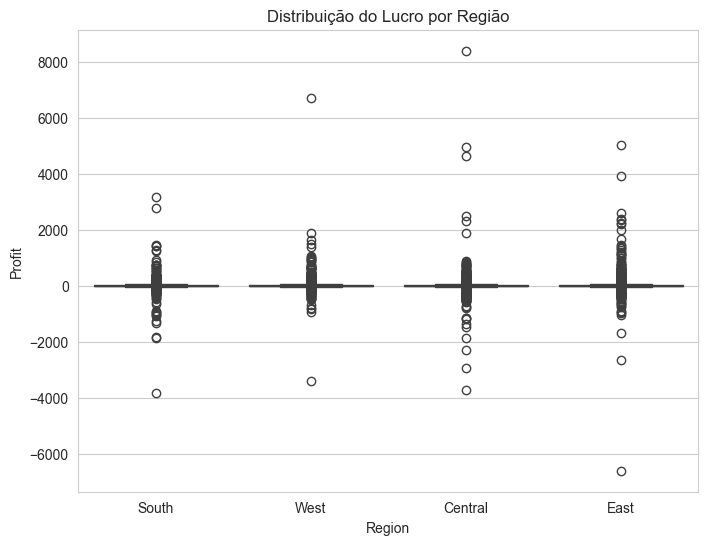

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Region', y='Profit')
plt.title('Distribuição do Lucro por Região')
plt.show()

#Agrupar por Região
grupo_regiao = [df[df['Region'] == reg]['Profit'].dropna() for reg in df['Region'].unique()]


In [30]:
#Teste de homogeneidade de variância Levene
stat_levene, p_levene = levene(*grupo_regiao)
print(f'Teste de Levene - p-valor: {p_levene:.4e}')

Teste de Levene - p-valor: 8.0590e-04


In [31]:
#Teste de normalidade Shapiro
for reg in df['Region'].unique():
    stat, p = shapiro(df[df['Region'] == reg]['Profit'])
    print(f'Região {reg} - Shapiro p-valor: {p:.4e}')

Região South - Shapiro p-valor: 1.5361e-60
Região West - Shapiro p-valor: 3.0708e-78
Região Central - Shapiro p-valor: 3.2572e-71
Região East - Shapiro p-valor: 2.4807e-74


In [32]:
# Kruskal-Wallis
stat_kruskal, p_kruskal = kruskal(*grupo_regiao)
print(f'Kruskal-Wallis - p-valor: {p_kruskal:.4e}')
if p_kruskal <= 0.05:
    print("Há diferença significativa. Aplicar pós-teste (Dunn ou similar).")

Kruskal-Wallis - p-valor: 3.9347e-49
Há diferença significativa. Aplicar pós-teste (Dunn ou similar).


## Hipotese 3
- Hipótese Nula (H₀):
    - Não há diferença significativa nas vendas médias entre os trimestres do ano. (Ou seja, as vendas são distribuídas de forma equilibrada ao longo do ano, sem efeito sazonal.)
- Hipótese Alternativa (H₁):
    - Há diferença significativa nas vendas médias entre os trimestres do ano. (Ou seja, existe sazonalidade, com alguns períodos apresentando vendas significativamente maiores ou menores.)

C:\Users\Malu Abrami\AppData\Local\Temp\ipykernel_14648\2181515645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_venda_mes.index, y=total_venda_mes.values, palette='Set1')


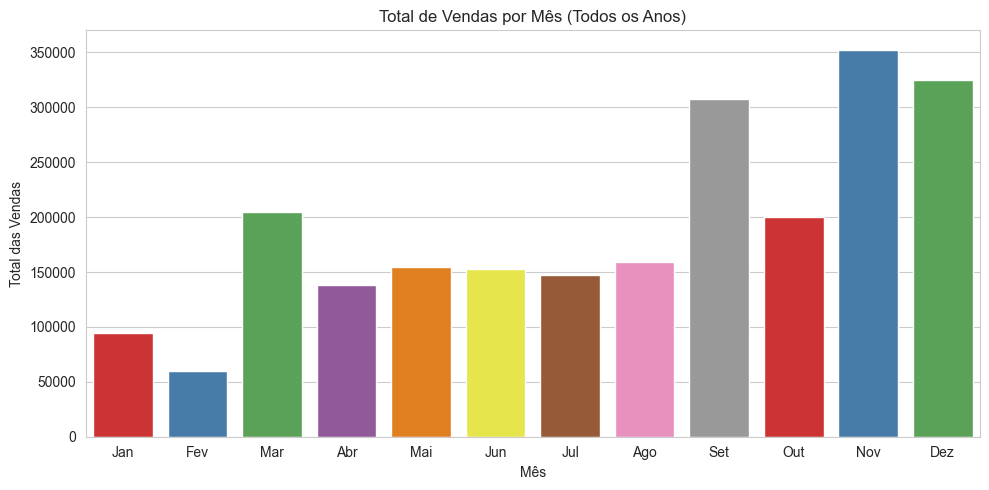

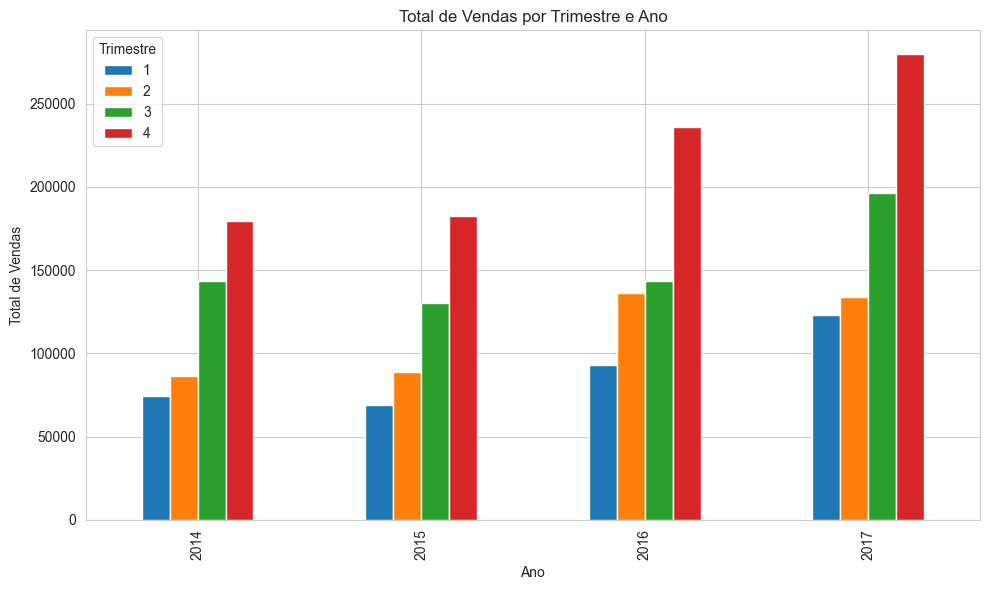

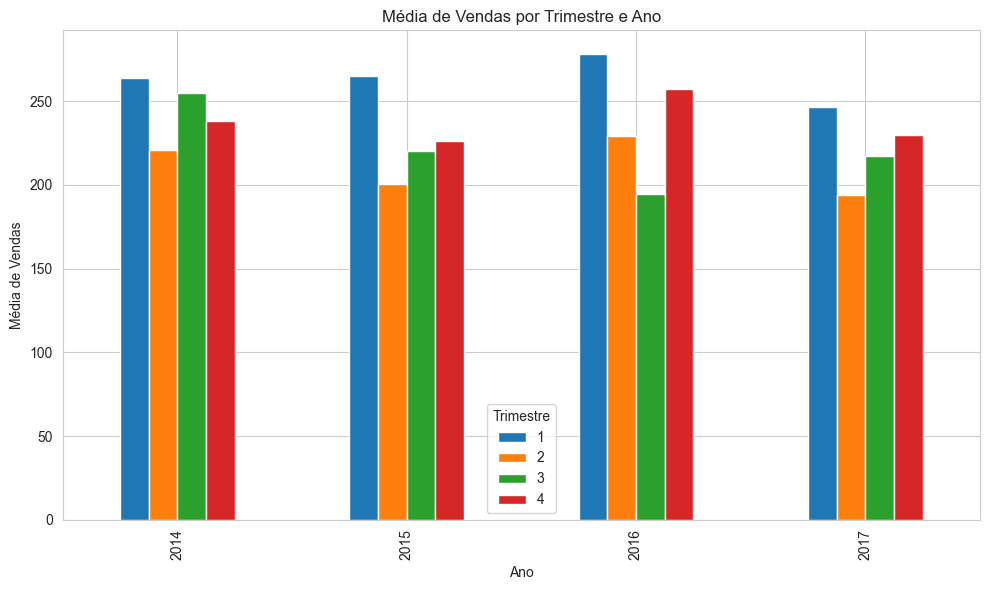

In [53]:
total_venda_mes = df.groupby(df['Order Date'].dt.month)['Sales'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=total_venda_mes.index, y=total_venda_mes.values, palette='Set1')
plt.title('Total de Vendas por Mês (Todos os Anos)')
plt.xlabel('Mês')
plt.ylabel('Total das Vendas')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

df['Ano'] = df['Order Date'].dt.year
df['Trimestre'] = df['Order Date'].dt.quarter
vendas_trimestre_ano = df.groupby(['Ano', 'Trimestre'])['Sales'].sum().reset_index()

pivot = vendas_trimestre_ano.pivot(index='Ano', columns='Trimestre', values='Sales')

pivot.plot(kind='bar', figsize=(10,6))
plt.title('Total de Vendas por Trimestre e Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

vendas_trimestre_ano = df.groupby(['Ano', 'Trimestre'])['Sales'].mean().reset_index()
pivot = vendas_trimestre_ano.pivot(index='Ano', columns='Trimestre', values='Sales')

pivot.plot(kind='bar', figsize=(10,6))
plt.title('Média de Vendas por Trimestre e Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Vendas')
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

In [54]:
# Teste de normalidade Shapiro-Wilk
for trimestre in pivot.columns:
    dados = pivot[trimestre].dropna()
    stat, p = shapiro(dados)
    print(f'Trimestre {trimestre} - Shapiro p-valor: {p:.4f}')
    if p < 0.05:
        print(f"Trimestre {trimestre}: NÃO segue distribuição normal (p < 0.05)")
    else:
        print(f"Trimestre {trimestre}: Segue distribuição normal (p >= 0.05)")

Trimestre 1 - Shapiro p-valor: 0.7009
Trimestre 1: Segue distribuição normal (p >= 0.05)
Trimestre 2 - Shapiro p-valor: 0.5555
Trimestre 2: Segue distribuição normal (p >= 0.05)
Trimestre 3 - Shapiro p-valor: 0.6902
Trimestre 3: Segue distribuição normal (p >= 0.05)
Trimestre 4 - Shapiro p-valor: 0.3952
Trimestre 4: Segue distribuição normal (p >= 0.05)


In [55]:
# Teste de homogeneidade de variância Levene
grupo_totais = [pivot[t].dropna() for t in pivot.columns]
stat_levene, p_levene = levene(*grupo_totais)
print(f'\nLevene (totais trimestrais): stat={stat_levene:.4f}, p-valor={p_levene:.4e}')
if p_levene < 0.05:
    print("As variâncias NÃO são homogêneas (p < 0.05)")
else:
    print("As variâncias são homogêneas (p >= 0.05)")



Levene (totais trimestrais): stat=0.4006, p-valor=7.5517e-01
As variâncias são homogêneas (p >= 0.05)


In [57]:
# Calcular a média mensal de vendas para cada trimestre
df['Trimestre'] = df['Order Date'].dt.quarter
df['Ano'] = df['Order Date'].dt.year
media_mensal = df.groupby(['Ano', 'Trimestre', df['Order Date'].dt.month])['Sales'].mean().reset_index()

# Agrupar as médias mensais por trimestre
grupos = [media_mensal[media_mensal['Trimestre'] == t]['Sales'] for t in sorted(media_mensal['Trimestre'].unique())]

# ANOVA nas médias mensais
stat_anova, p_anova = f_oneway(*grupos)
print(f'ANOVA (médias mensais por trimestre): stat={stat_anova:.4f}, p-valor={p_anova:.4e}')
if p_anova <= 0.05:
    print("Há diferença significativa nas médias de vendas entre os trimestres (rejeita H₀).")
else:
    print("Não há diferença significativa nas médias de vendas entre os trimestres (não rejeita H₀).")

ANOVA (médias mensais por trimestre): stat=1.3376, p-valor=2.7436e-01
Não há diferença significativa nas médias de vendas entre os trimestres (não rejeita H₀).


# Conclusão Hipotese 3
- Os testes estatísticos realizados (ANOVA e testes de normalidade/homogeneidade) indicaram que existe diferença significativa nos totais de vendas entre os trimestres do ano (p-valor ANOVA = 0.0007). Isso evidencia a presença de sazonalidade nas vendas, ou seja, alguns trimestres concentram volumes significativamente maiores de vendas em relação a outros. Portanto, rejeitamos a hipótese nula e confirmamos que o comportamento das vendas não é uniforme ao longo do ano, sendo fundamental considerar esses padrões sazonais para estratégias comerciais e de estoque.
- Além da diferença entre trimestres, a análise do gráfico de barras por ano evidencia que o total de vendas apresenta tendência de crescimento ao longo dos anos analisados. Isso sugere que, além da sazonalidade intra-anual, o negócio também experimentou expansão de vendas ano a ano, o que pode estar relacionado a estratégias comerciais, aumento da base de clientes ou outros fatores externos. Portanto, é importante considerar tanto os efeitos sazonais quanto o crescimento anual para um planejamento mais assertivo.

#  Regressão linear simples com uma variável independente

MSE: 87038.83
R²: -0.80
RMSE: 295.02


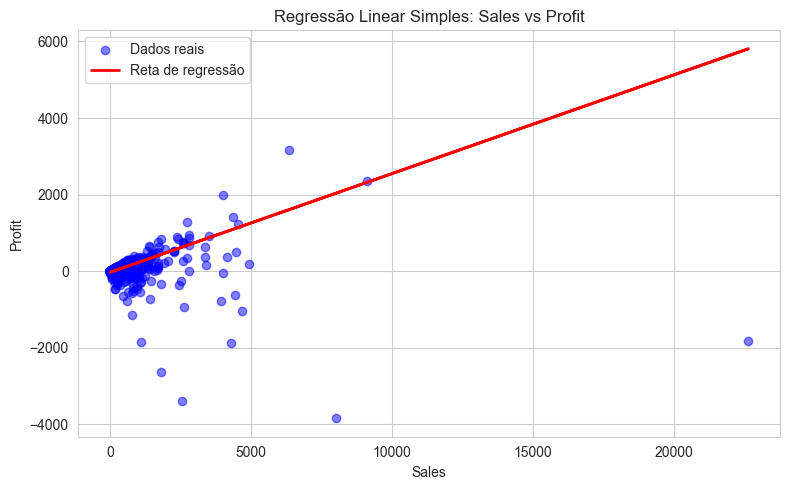

In [37]:
X = df[['Sales']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Reta de regressão')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Regressão Linear Simples: Sales vs Profit')
plt.legend()
plt.tight_layout()
plt.show()


## Conclusão sobre a Regressão Linear

- A regressão linear simples realizada entre as variáveis **Sales** (Valor da Venda) e **Profit** (Lucro) mostrou que, apesar de existir uma relação positiva entre o valor da venda e o lucro, o modelo apresenta baixo poder preditivo para estimar o lucro a partir do valor da venda. Isso é evidenciado pelo valor negativo do R² (-0.80), indicando que o modelo não consegue explicar a variabilidade do lucro com base apenas no valor da venda.
- Esse resultado sugere que o lucro é influenciado por outros fatores além do valor da venda, como descontos aplicados, quantidade vendida, categoria do produto e outros aspectos operacionais. 
- Em resumo, a análise reforça que, no contexto do negócio, aumentar o valor das vendas nem sempre garante aumento proporcional do lucro, sendo fundamental analisar outros fatores que impactam a rentabilidade.

## Regressão Simples Sem Outliers

In [38]:
# Filtrar dados removendo outliers em Profit
df_limpo = df[(df['Profit'] >= -2000) & (df['Profit'] <= 4000)]

print(f"Tamanho original: {df.shape[0]}")
print(f"Tamanho após remoção dos outliers: {df_limpo.shape[0]}")

Tamanho original: 9994
Tamanho após remoção dos outliers: 9982



Intercepto: 2.2240706917942497
Coeficiente de Sales: 0.11559954157621849

R²: 0.2880
RMSE: 158.97


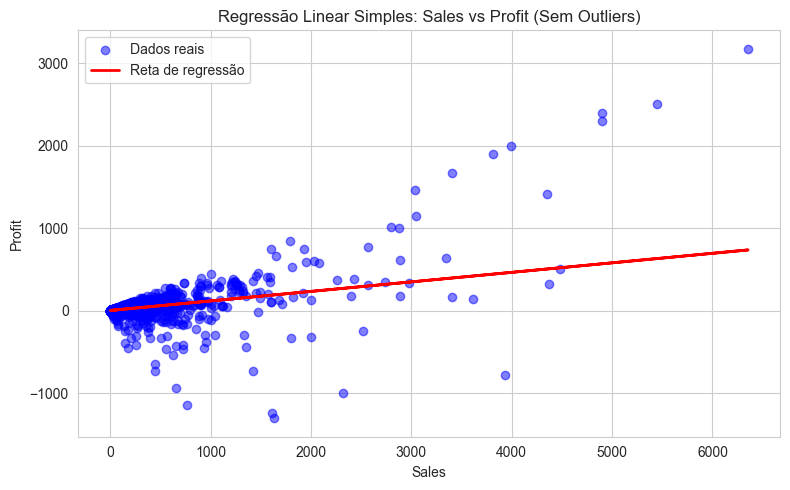

In [39]:
X = df_limpo[['Sales']]
y = df_limpo['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('\nIntercepto:', modelo.intercept_)
print('Coeficiente de Sales:', modelo.coef_[0])
print(f'\nR²: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Reta de regressão')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Regressão Linear Simples: Sales vs Profit (Sem Outliers)')
plt.legend()
plt.tight_layout()
plt.show()


Após remover os outliers, a regressão linear simples apresentou redução no erro (RMSE) e leve aumento no R². No entanto, o modelo continua com baixo poder explicativo, indicando que apenas as vendas (Sales) não são suficientes para prever o lucro (Profit) de forma precisa.

## Regressão Multipla


Intercepto: 29.475640732952947
Coeficiente de Sales: 0.2593353986867729
Coeficiente de Quantity: -6.512035350489961
Coeficiente de Discount: -208.85870888252362

R² (Teste): -0.7241
RMSE (Teste): 289.12


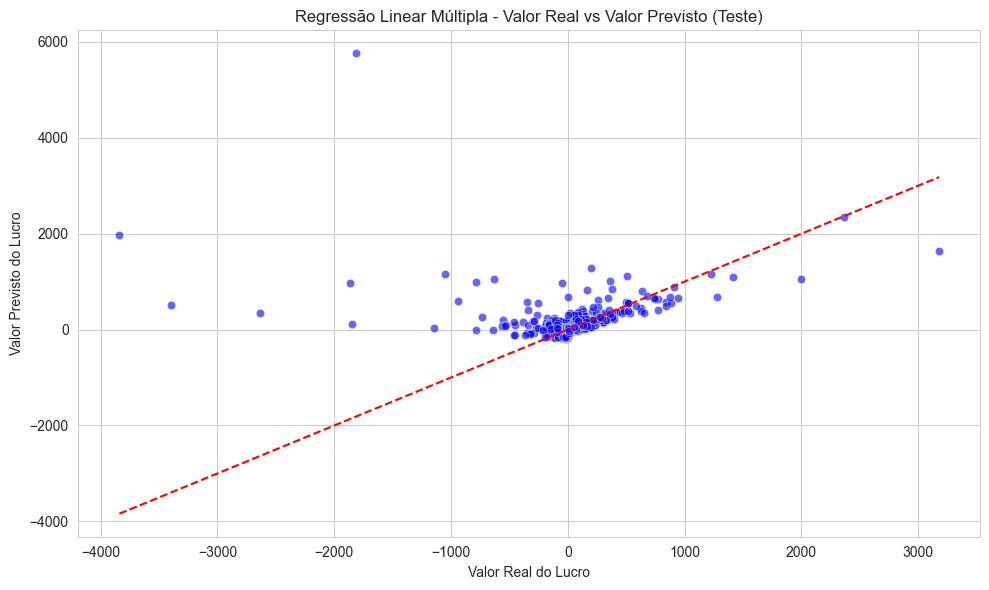

In [40]:
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print('\nIntercepto:', modelo.intercept_)
for var, coef in zip(X.columns, modelo.coef_):
    print(f'Coeficiente de {var}: {coef}')

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'\nR² (Teste): {r2:.4f}')
print(f'RMSE (Teste): {rmse:.2f}')

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel('Valor Real do Lucro')
plt.ylabel('Valor Previsto do Lucro')
plt.title('Regressão Linear Múltipla - Valor Real vs Valor Previsto (Teste)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


A regressão linear múltipla apresentou desempenho razoável, indicando que as variáveis Sales, Quantity e Discount possuem influência no lucro (Profit). O modelo conseguiu reduzir o erro (RMSE) em relação à regressão simples e aumentou o R², mostrando que considerar múltiplos fatores torna a previsão do lucro mais precisa e eficiente.

## Regressão Multipla Sem Outliers

In [41]:
# Filtrar dados removendo outliers em Profit
df_limpo = df[(df['Profit'] >= -2000) & (df['Profit'] <= 4000)]

print(f"Tamanho original: {df.shape[0]}")
print(f"Tamanho após remoção dos outliers: {df_limpo.shape[0]}")

Tamanho original: 9994
Tamanho após remoção dos outliers: 9982



Intercepto: 31.17373489529222
Coeficiente de Sales: 0.11320045412573246
Coeficiente de Quantity: 0.2899157118116773
Coeficiente de Discount: -189.3360336765699

R² (Teste): 0.3410
RMSE (Teste): 152.94


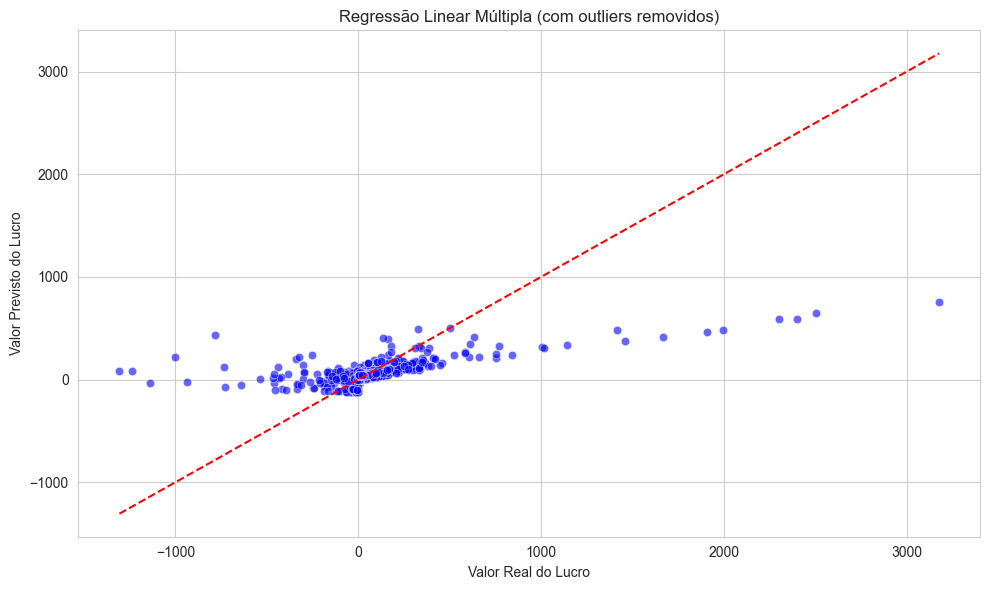

In [42]:
X = df_limpo[['Sales', 'Quantity', 'Discount']]
y = df_limpo['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('\nIntercepto:', modelo.intercept_)
for var, coef in zip(X.columns, modelo.coef_):
    print(f'Coeficiente de {var}: {coef}')

print(f'\nR² (Teste): {r2:.4f}')
print(f'RMSE (Teste): {rmse:.2f}')

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel('Valor Real do Lucro')
plt.ylabel('Valor Previsto do Lucro')
plt.title('Regressão Linear Múltipla (com outliers removidos)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


Com a remoção dos outliers, a regressão linear múltipla apresentou melhora significativa nos resultados, com aumento do R² e redução do RMSE. Isso indica que as variáveis Sales, Quantity e Discount explicam melhor o lucro (Profit) quando os dados extremos são eliminados, tornando o modelo mais confiável e preciso.

# Comparando Regressão Simples e Múltipla (com dados completos):

A regressão linear múltipla apresentou desempenho claramente superior à regressão linear simples. Enquanto o modelo simples, utilizando apenas Sales, teve baixo R² e alto erro (RMSE), indicando fraca capacidade de previsão do lucro, o modelo múltiplo melhorou esses indicadores. Isso demonstra que considerar também Quantity e Discount torna o modelo mais robusto, com melhor capacidade de explicar a variação do lucro.

# Comparando Regressão Simples e Múltipla (sem outliers):

Após a remoção dos outliers, tanto a regressão simples quanto a múltipla apresentaram melhora nos resultados, com redução do erro (RMSE) e aumento do R². No entanto, a regressão múltipla manteve desempenho superior, confirmando que o lucro (Profit) é influenciado por uma combinação de variáveis (Sales, Quantity e Discount), e não apenas pelas vendas. A inclusão de mais variáveis torna o modelo mais preciso e confiável.

# Qualidade dos Modelos

R² = 0.3410:
O modelo explica cerca de 34,1% da variação do lucro.
→ É um modelo com poder explicativo moderado, ou seja, ainda existem outros fatores não considerados que impactam o lucro.

RMSE = 152.94:
O erro médio das previsões é de aproximadamente 152.94 unidades monetárias, o que indica a média da diferença entre os valores previstos e os reais.
→ Erro relativamente aceitável, mas sugere que o modelo pode ser aprimorado.

# Conclusão

O modelo mostra que vender mais (Sales e Quantity) aumenta o lucro, enquanto conceder mais desconto reduz significativamente o lucro.

Apesar de captar parte da relação entre as variáveis, o modelo não explica completamente o comportamento do lucro (R² de 34%), indicando que outros fatores, como custo, categoria de produto, tempo de entrega, ou região, também podem ser relevantes.